In [1]:
!pip install pmdarima

   ---------------------------------------- 0.0/615.5 kB ? eta -:--:--
   -- ------------------------------------ 41.0/615.5 kB 991.0 kB/s eta 0:00:01
   ---------------------------------- ----- 532.5/615.5 kB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 615.5/615.5 kB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------- -------------------- 1.3/2.8 MB 28.1 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 35.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 25.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
# 데이터 로드
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)

In [6]:
# 로그 변환
data_log = np.log(data)

In [7]:
# 데이터 분할
train_log = data_log[:'1959']
test_log = data_log['1960':]

In [8]:

# Auto-ARIMA 모델 학습
model_auto = auto_arima(train_log, seasonal=True, m=12)
model_auto_fit = model_auto.fit(train_log)


In [9]:

# 예측 수행
predictions_log = model_auto_fit.predict(n_periods=len(test_log))
predictions_log = pd.Series(predictions_log, index=test_log.index)


In [10]:
# 로그 변환 복원
predictions = np.exp(predictions_log)
test = np.exp(test_log)



In [11]:
# 성능 평가
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 530.3513805657503


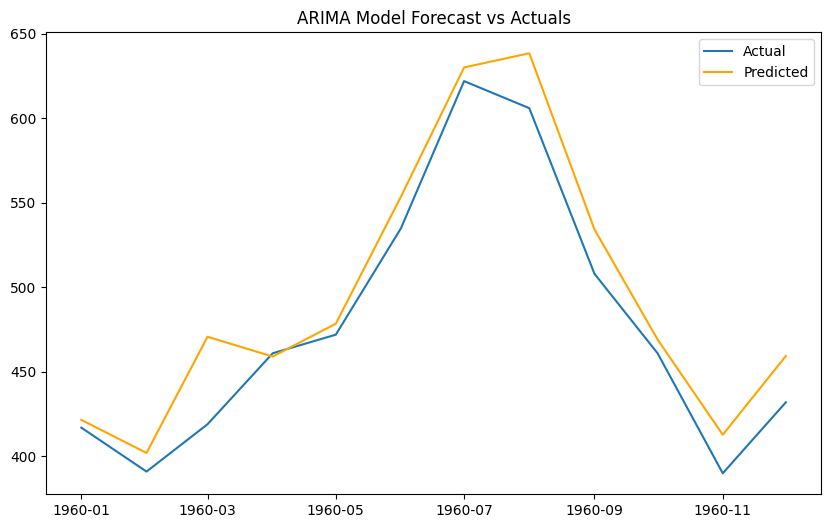

In [12]:

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', color='orange')
plt.title('ARIMA Model Forecast vs Actuals')
plt.legend()
plt.show()
